***Z-score***

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
eng = pd.read_csv('eng_test.csv', sep=';')
eng

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES
...,...,...,...,...
269,ID95,TOEFL,88.0,YES
270,ID96,TOEFL,90.0,YES
271,ID97,TOEFL,90.0,YES
272,ID98,TOEFL,54.0,NO


In [ ]:
eng.Exam.unique()

array(['TOEFL', 'IELTS'], dtype=object)

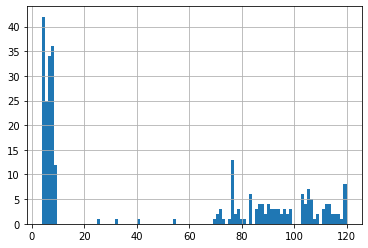

In [ ]:
eng['Score'].hist(bins=100)

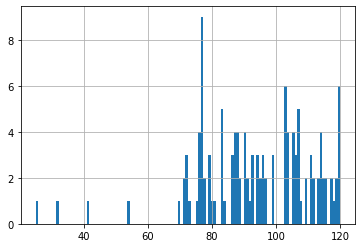

In [ ]:
toefl = eng[eng['Exam'] == 'TOEFL']
toefl['Score'].hist(bins=120)

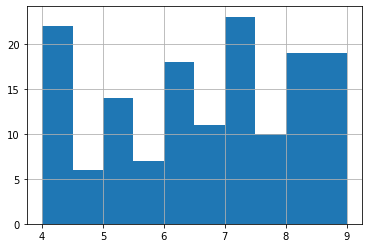

In [ ]:
ielts = eng[eng['Exam'] == 'IELTS']
ielts['Score'].hist()

In [ ]:
x = toefl['Score'][0]
mean = toefl['Score'].mean()
std = toefl['Score'].std(ddof=0)
z_score = (x - mean) / std
z_score

-0.9407782522297515

In [ ]:
z_new = 1.4706109
x_new = round(mean + z_new * std)
x_new

120

In [ ]:
toefl['z-score'] = scipy.stats.zscore(toefl['Score'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
toefl

,Id,Exam,Score,Advanced,z-score
0,ID1,TOEFL,77.0,NO,-0.940778
1,ID10,TOEFL,105.0,NO,0.629429
2,ID100,TOEFL,107.0,YES,0.741586
3,ID101,TOEFL,72.0,NO,-1.221172
4,ID102,TOEFL,120.0,YES,1.470611
...,...,...,...,...,...
269,ID95,TOEFL,88.0,YES,-0.323911
270,ID96,TOEFL,90.0,YES,-0.211754
271,ID97,TOEFL,90.0,YES,-0.211754
272,ID98,TOEFL,54.0,NO,-2.230591


In [ ]:
ielts['z-score'] = scipy.stats.zscore(ielts['Score'])
ielts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,Exam,Score,Advanced,z-score
30,ID126,IELTS,9.0,YES,1.639443
31,ID127,IELTS,5.0,NO,-0.915088
32,ID128,IELTS,7.5,YES,0.681494
33,ID129,IELTS,5.0,NO,-0.915088
35,ID130,IELTS,4.0,NO,-1.553720
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


In [ ]:
eng_new = pd.concat([toefl, ielts])
eng_new

,Id,Exam,Score,Advanced,z-score
0,ID1,TOEFL,77.0,NO,-0.940778
1,ID10,TOEFL,105.0,NO,0.629429
2,ID100,TOEFL,107.0,YES,0.741586
3,ID101,TOEFL,72.0,NO,-1.221172
4,ID102,TOEFL,120.0,YES,1.470611
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


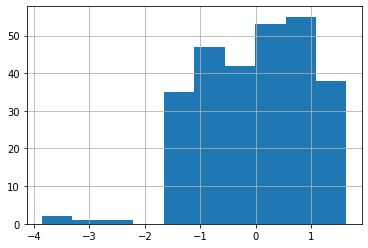

In [ ]:
eng_new['z-score'].hist()

In [ ]:
eng_new[eng_new['z-score'] < -3]

,Id,Exam,Score,Advanced,z-score
25,ID121,TOEFL,32.0,NO,-3.464325
27,ID123,TOEFL,25.0,YES,-3.856877


In [ ]:
eng_new.groupby('Advanced')['z-score'].mean()

Advanced
NO    -0.397672
YES    0.440499
Name: z-score, dtype: float64

In [ ]:
bikes = pd.read_pickle('BikeData.pkl')
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,0,True,644,0,Chilly,0
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,0,True,359,0,Chilly,0
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,0,True,1236,0,Chilly,0
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,0,True,628,1,Chilly,0


In [ ]:
bikes['Rental Count'].describe()

count    8760.000000
mean      696.582078
std       749.812613
min         0.000000
25%       157.000000
50%       425.500000
75%      1009.000000
max      6012.000000
Name: Rental Count, dtype: float64

In [ ]:
Q3 = np.percentile(bikes['Rental Count'], 75)
Q1 = np.percentile(bikes['Rental Count'], 25)
print(Q3, Q1)

1009.0 157.0


In [ ]:
iqr = Q3 - Q1
print(iqr)

852.0


In [ ]:
iqr_threshold_bottom = Q1 - 1.5 * iqr
iqr_threshold_top = Q3 + 1.5 * iqr
print(iqr_threshold_bottom, iqr_threshold_top)

-1121.0 2287.0


In [ ]:
bikes[bikes['Rental Count'] > iqr_threshold_top].shape

(413, 14)

In [ ]:
bikes[bikes['Rental Count'] > iqr_threshold_top]['Seasons'].value_counts()

Summer    196
Autumn    116
Spring    101
Name: Seasons, dtype: int64

In [ ]:
mean = bikes['Rental Count'].mean()
std = bikes['Rental Count'].std()
std_threshold_bottom = mean - 2.5 * std
std_threshold_top = mean + 2.5 * std
print(std_threshold_bottom, std_threshold_top)

-1177.949455164326 2571.113610415468


In [ ]:
bikes[bikes['Rental Count'] > std_threshold_top].shape

(278, 14)

In [ ]:
iqr_no_outliers = bikes[bikes['Rental Count'] <= iqr_threshold_top]
std_no_outliers = bikes[bikes['Rental Count'] <= std_threshold_top]
print(bikes['Rental Count'].median())
print(iqr_no_outliers['Rental Count'].median())
print(std_no_outliers['Rental Count'].median())

425.5
392.0
402.0


***Missing values***

In [ ]:
def get_temp_cat(temp):
  if temp < 0:
    return 'Freezing'
  elif temp < 15:
    return 'Chilly'
  elif temp < 26:
    return 'Nice'
  elif temp >= 26:
    return 'Hot'
  else:
    return temp

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Good Weather      

In [ ]:
bikes.isna().sum()

Date                      0
Hour                      0
Temperature             179
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good Weather              0
dtype: int64

In [ ]:
type(bikes[bikes['Temperature'].isna()]['Temperature'][39])

numpy.float64

In [ ]:
bikes.dropna(subset=['Temperature']).shape

(8581, 14)

In [ ]:
bikes['Temperature_median'] = bikes['Temperature'].fillna(bikes['Temperature'].median())
bikes[bikes['Temperature'].isna()]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_median
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,0,True,262,0,NaN,0,13.7
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,0,True,577,0,NaN,0,13.7
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,0,True,313,0,NaN,0,13.7
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,0,True,269,0,NaN,0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,2018-11-27,5,NaN,84,0.6,0.0,0.0,Autumn,0,True,176,0,NaN,0,13.7
8679,2018-11-27,15,NaN,70,2.1,0.0,0.0,Autumn,0,True,670,0,NaN,0,13.7
8710,2018-11-28,22,NaN,34,1.3,0.0,0.0,Autumn,0,True,1034,0,NaN,0,13.7
8717,2018-11-29,5,NaN,34,0.9,0.0,0.0,Autumn,0,True,30,0,NaN,0,13.7


In [ ]:
bikes.iloc[38:42]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_median
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,0,True,1054,0,Chilly,0,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,0,True,592,1,Chilly,0,6.4
41,2017-12-02,17,6.0,51,2.5,0.0,0.0,Winter,0,True,141,1,Chilly,0,6.0


In [ ]:
np.random.choice(bikes['Temperature'].dropna())

10.1

In [ ]:
temps_random = np.random.choice(bikes['Temperature'].dropna(), 8760)

In [ ]:
temps_random

array([-4.4, 29.3, -1.4, ...,  2.2,  0.3, 20.9])

In [ ]:
bikes['Temperature_random'] = bikes['Temperature'].fillna(pd.Series(temps_random))

In [ ]:
bikes[bikes['Temperature'].isna()]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_median,Temperature_random
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7,23.5
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,0,True,262,0,NaN,0,13.7,4.7
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,0,True,577,0,NaN,0,13.7,22.4
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,0,True,313,0,NaN,0,13.7,6.9
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,0,True,269,0,NaN,0,13.7,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,2018-11-27,5,NaN,84,0.6,0.0,0.0,Autumn,0,True,176,0,NaN,0,13.7,28.7
8679,2018-11-27,15,NaN,70,2.1,0.0,0.0,Autumn,0,True,670,0,NaN,0,13.7,13.9
8710,2018-11-28,22,NaN,34,1.3,0.0,0.0,Autumn,0,True,1034,0,NaN,0,13.7,-5.5
8717,2018-11-29,5,NaN,34,0.9,0.0,0.0,Autumn,0,True,30,0,NaN,0,13.7,6.3


In [ ]:
temp_median = bikes.groupby([bikes['Date'].dt.week, 'Hour'])['Temperature'].transform('median')
bikes['Temperature_median_group'] = bikes['Temperature'].fillna(temp_median)
bikes[bikes['Temperature'].isna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_median,Temperature_random,Temperature_median_group
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7,23.5,7.50
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,0,True,262,0,NaN,0,13.7,4.7,1.35
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,0,True,577,0,NaN,0,13.7,22.4,7.20
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,0,True,313,0,NaN,0,13.7,6.9,-2.40
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,0,True,269,0,NaN,0,13.7,2.5,-4.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,2018-11-27,5,NaN,84,0.6,0.0,0.0,Autumn,0,True,176,0,NaN,0,13.7,28.7,0.70
8679,2018-11-27,15,NaN,70,2.1,0.0,0.0,Autumn,0,True,670,0,NaN,0,13.7,13.9,7.50
8710,2018-11-28,22,NaN,34,1.3,0.0,0.0,Autumn,0,True,1034,0,NaN,0,13.7,-5.5,3.50
8717,2018-11-29,5,NaN,34,0.9,0.0,0.0,Autumn,0,True,30,0,NaN,0,13.7,6.3,0.70


In [ ]:
bikes.iloc[38:42]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_median,Temperature_random,Temperature_median_group
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,0,True,1054,0,Chilly,0,7.3,7.3,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7,23.5,7.5
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,0,True,592,1,Chilly,0,6.4,6.4,6.4
41,2017-12-02,17,6.0,51,2.5,0.0,0.0,Winter,0,True,141,1,Chilly,0,6.0,6.0,6.0


In [ ]:
bikes['Temperature'] = bikes['Temperature'].fillna(temp_median)
del bikes['Temperature_median']
del bikes['Temperature_median_group']
del bikes['Temperature_random']

KeyError: ignored

In [ ]:
del bikes['Temperature_random']
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,0,True,644,0,Chilly,0
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,0,True,359,0,Chilly,0
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,0,True,1236,0,Chilly,0
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,0,True,628,1,Chilly,0


In [ ]:
bikes['Temperature Category'] = pd.Categorical(bikes['Temperature'].apply(get_temp_cat))
bikes[bikes['Temperature Category'].isna()]
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8760 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8760 non-null   category      
 13  Good Weather      

In [ ]:
bikes.to_pickle(' BikeDataImp.pkl')